___CAI___  
*Elías Abad Rocamora*  
*Víctor Novelle Moriano* 

# Lab Session 1: Powerlaws
---

## 2. Distribution of family names
### Exercise 1

First, we import the necessary libraries.

In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

Now, we transform the .csv file into a *data frame*, in order to work more comfortably.

In [3]:
df = pd.read_csv('apellidos.csv',sep=';')
print(df)

       Orden   Apellido  Apellido 1  Apellido 2  Ambos apellidos
0          1     GARCIA     1473189     1489086            80494
1          2   GONZALEZ      927393      935408            41786
2          3  RODRIGUEZ      926148      934360            43397
3          4  FERNANDEZ      919724      929292            52364
4          5      LOPEZ      872744      879628            35185
...      ...        ...         ...         ...              ...
73886  74011    ZOTESCU          20           0                0
73887  74012    ZOUGANI          20           0                0
73888  74013    ZOUITEN          20           0                0
73889  74014      ZSIGA          20           0                0
73890  74015      ZUDOR          20           0                0

[73891 rows x 5 columns]


Finally, we proceed to plot the requested variables.

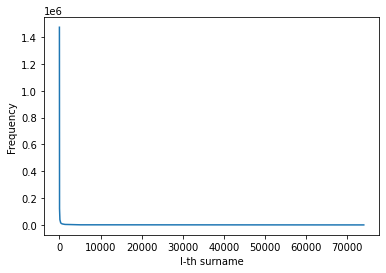

In [4]:
plt.plot(df['Orden'],df['Apellido 1'])
plt.xlabel('I-th surname')
plt.ylabel('Frequency')
plt.show()

In this plot, we can see that a large amount of surnames is infrequent.  
We have also plotted the first 100 surnames in order to show that a decreasing tendency is present (zoom on the vertical line on the left).

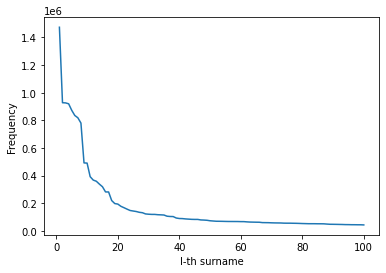

In [5]:
plt.plot(df[:100]['Orden'],df[:100]['Apellido 1'])
plt.xlabel('I-th surname')
plt.ylabel('Frequency')
plt.show()

---
### Exercise 3

Plot using logarithms in both axes.

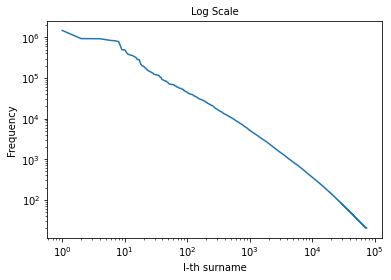

In [6]:
plt.plot(df['Orden'],df['Apellido 1'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I-th surname')
plt.ylabel('Frequency')
plt.title('Log Scale', fontsize=10)
plt.show()

---
### Exercise 4

First, we selected two large values of $x$, in order to compute $a$ and $c$ analytically.

In [7]:
print("x1: 2500 | y1:",df["Apellido 1"].loc[2500],"\nx2: 20000 | y2:",df["Apellido 1"].loc[20000])

x1: 2500 | y1: 1875 
x2: 20000 | y2: 141


Then we proceded to compute $a$ and $c$ replacing the values in the following expressions:

$a =\frac {log(y1) - log(y2)}{log(x1) - log(x2)}$

$log(c) = log(y1) - a \cdot log(x1)$

In [8]:
a = (np.log(1875) - np.log(141))/(np.log(2500) - np.log(20000))
c = np.exp(np.log(1875) - a*np.log(2500))
print("a:",a,"\nc:",c)

a: -1.2443745092906042 
c: 31718394.980060067


Now, we plot the obtained line next to the previous graphic.

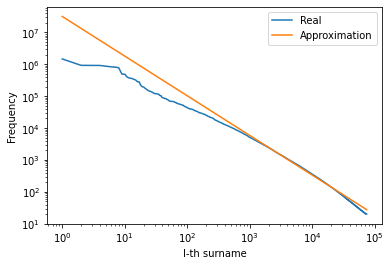

In [9]:
x = df['Orden']
y = (x**a)*c
plt.plot(x,df['Apellido 1'],label ='Real')
plt.plot(x,y,label = "Approximation")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I-th surname')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As we can see, the obtained line adjusts correctly for larger $x$, but for lower values does not perform correctly.  
We can try to improve the adjustment adding the $b$ parameter on the *power law* and testing several values.

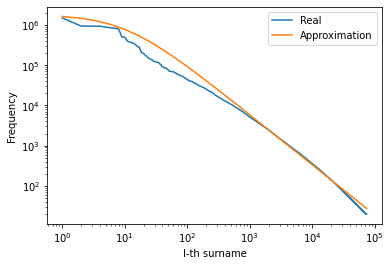

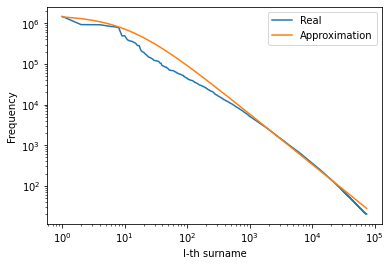

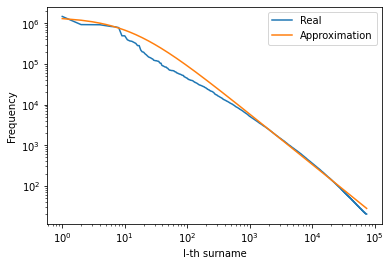

In [10]:
for b in range (10,13):
    x2 = df['Orden']
    y2 = ((x+b)**a)*c
    plt.plot(x2,df['Apellido 1'],label ='Real')
    plt.plot(x2,y2,label = "Approximation")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('I-th surname')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

We also used linear regression to obtain the values of the intercept and the slope.

In [11]:
reg = linear_model.LinearRegression()
reg.fit(np.array(np.log(df['Orden'])).reshape(-1, 1),np.log(df['Apellido 1']))
print(reg.coef_,reg.intercept_)

[-1.32683327] 17.96860738150553


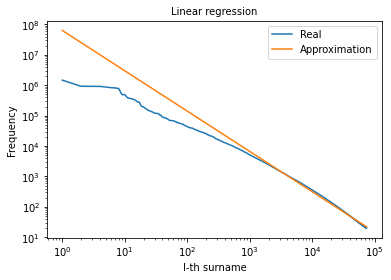

In [12]:
x3 = df['Orden']
y3 = (x3)**reg.coef_ * np.exp(reg.intercept_) 
plt.plot(x3,df['Apellido 1'], label = "Real")
plt.plot(x3,y3, label = "Approximation")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I-th surname')
plt.ylabel('Frequency')
plt.title('Linear regression', fontsize=10)
plt.legend()
plt.show()

---
## 3. Distribution of river lengths
### Exercise 6  
Transformation of the .csv file into a *data frame*.

In [13]:
df2 = pd.read_csv('rivers.csv',sep=';')
print(df2.head())

   Order                           River  Length (km)  Length (miles)  \
0      1                   Nile  Kagera         6650            4132   
1      2     Amazon  Ucayali  Apurímac         6400            3976   
2      3           Yangtze (Chang Jiang)         6300            3917   
3      4  MississippiMissouriJefferson         6275            3902   
4      5          YeniseiAngaraSelenge         5539            3445   

   Drainage area (km2)  Average discharge (m3/s)         Outflow  \
0            3254555.0                    5100.0   Mediterranean   
1            7050000.0                  219000.0  Atlantic Ocean   
2            1800000.0                   31900.0  East China Sea   
3            2980000.0                   16200.0  Gulf of Mexico   
4            2580000.0                   19600.0        Kara Sea   

                     Countries in the drainage basin  
0  Ethiopia, Eritrea, Sudan, Uganda, Tanzania, Ke...  
1  Brazil, Peru, Bolivia, Colombia, Ecuado

First, we plot the lenght of the rivers in a normal scale.

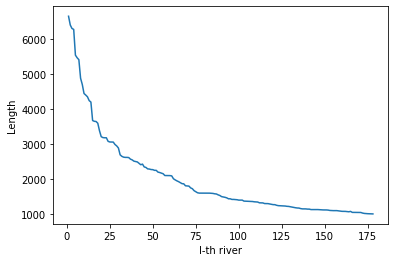

In [14]:
plt.plot(df2['Order'],df2['Length (km)'])
plt.xlabel('I-th river')
plt.ylabel('Length')
plt.show()

Now we apply logarithms in both scales, in order to check if it follows a power law distribution.

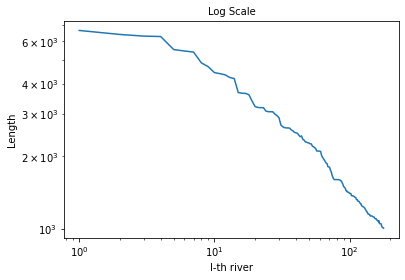

In [15]:
plt.plot(df2['Order'],df2['Length (km)'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I-th river')
plt.ylabel('Length')
plt.title('Log Scale', fontsize=10)
plt.show()

Now, we proceed to check the outlier on the _"Drainage area (km2)"_ variable.

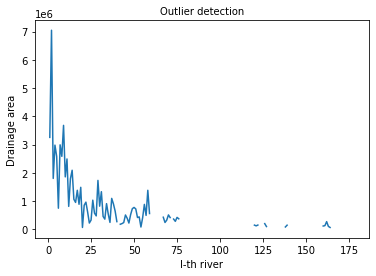

In [16]:
plt.plot(df2['Order'],df2['Drainage area (km2)'])
plt.xlabel('I-th river')
plt.ylabel('Drainage area')
plt.title('Outlier detection', fontsize=10)
plt.show()

As can be seen from the above plot, an humongous outlier is present in the first position, which corresponds to the ***Amazon Ucayali Apurímac*** river, which has a notably larger value than the rest.

In [17]:
print("Value of Drainage area of Amazon Ucayall Apurímac:",max(df2['Drainage area (km2)']),"\nAverage Drainage area:",np.mean(df2['Drainage area (km2)']))

Value of Drainage area of Amazon Ucayall Apurímac: 7050000.0 
Average Drainage area: 766244.2268041237


---
## 4. Words in Text
### Exercise 7
Creation of the Python code.

In [45]:
import csv
import string
from os import listdir
from os.path import isfile, join, isdir

def write_csv(dicc, output_filename,var1,var2):
    with open(output_filename, 'w', newline='') as file:
        header = "Order;" + var1 + ";" + var2 + "\n"
        file.write(header)
        i =1
        for pair in dicc.items():
            row = str(i) + ";"+ str(pair[0]) + ";" + str(pair[1]) + "\n"
            i += 1
            file.write(row)
        file.close()


def readWords(path,output_filename,k = 0):
    dicc = {}
    new_words = {}
    translator = str.maketrans(string.punctuation,' '*len(string.punctuation)) #To transform punctuation to spaces.
    n_words = 0
    diff_words = 0
    for f in listdir(path): #For all the files present in the provided directory:
        ff = join(path,f)
        print("procesing ",ff) #Establishes the absolut route to each file.
        for line in open(ff,"r",encoding="utf8"):#For each line of that specific file:
            line = line.translate(translator)
            line = line.lower() # Lowercases the line.
            for word in line.split():
                n_words += 1
                if word in dicc:
                    dicc[word] += 1
                else:
                    diff_words +=1
                    dicc[word] = 1
                if k != 0 and n_words%k == 0:
                    new_words[str(n_words)] = diff_words


    dicc_sort = dict(sorted(dicc.items(), key=lambda element: (-element[1], element[0])))
    write_csv(dicc_sort,output_filename,"Word","Frequency")
    write_csv(new_words,"new_words.csv","N","New words")
    print("Finished!")

In [46]:
path = "./novels"
readWords(path,'freq_words.csv',3)

procesing  ./novels/RiceBurroughsAprincessofMars.txt
procesing  ./novels/pg37766.txt
procesing  ./novels/WellsTimeMachine.txt
procesing  ./novels/pg22566.txt
procesing  ./novels/pg20939.txt
procesing  ./novels/DickensAChristmasCarol.txt
procesing  ./novels/pg13314.txt
procesing  ./novels/pg4228.txt
procesing  ./novels/pg2482.txt
procesing  ./novels/pg1410.txt
procesing  ./novels/pg22082.txt
procesing  ./novels/DarwinOriginofSpecies.txt
procesing  ./novels/pg31796.txt
procesing  ./novels/pg38498.txt
procesing  ./novels/LondonCallofTheWild.txt
procesing  ./novels/pg4361.txt
procesing  ./novels/DickensGreatExpectations.txt
procesing  ./novels/DickensThePickwickPapers.txt
procesing  ./novels/pg20826.txt
procesing  ./novels/PoeWorksVol2.txt
procesing  ./novels/pg43550.txt
procesing  ./novels/pg17326.txt
procesing  ./novels/pg4358.txt
procesing  ./novels/pg31151.txt
procesing  ./novels/WellsWarofTheWorlds.txt
procesing  ./novels/pg4064.txt
procesing  ./novels/pg6087.txt
procesing  ./novels/P

In [74]:
def plot_power_laws(file,var1,var2):
    df = pd.read_csv(file,sep=';')
    print(df)
    plt.plot(df[var1],df[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
    
    plt.plot(df[var1],df[var2])    
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title('Log scale')
    plt.show()

### Exercise 8

       Order        Word  Frequency
0          1         the     206665
1          2          of     116794
2          3         and     101592
3          4          to      84205
4          5           a      65407
...      ...         ...        ...
55985  55986     “virtue          1
55986  55987         “we          1
55987  55988  “whosoever          1
55988  55989       “wine          1
55989  55990       ”—not          1

[55990 rows x 3 columns]


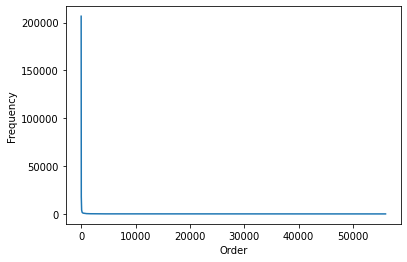

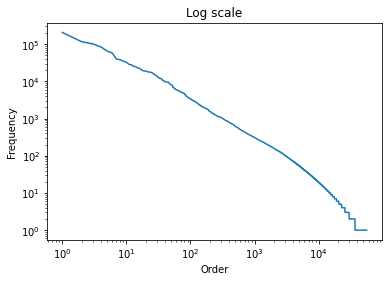

In [75]:
plot_power_laws(input_file,var1,var2)

### Exercise 9

           Order        N  New words
0              1        3          3
1              2        6          6
2              3        9          8
3              4       12         11
4              5       15         13
...          ...      ...        ...
1058758  1058759  3176277      55990
1058759  1058760  3176280      55990
1058760  1058761  3176283      55990
1058761  1058762  3176286      55990
1058762  1058763  3176289      55990

[1058763 rows x 3 columns]


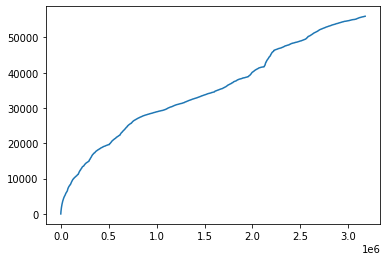

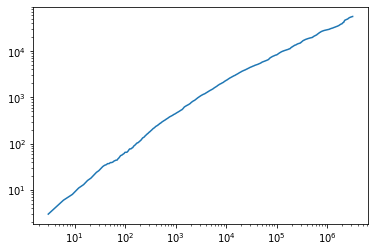

In [71]:
plot_power_laws("new_words.csv",'N','New words')